In [1]:
import seaborn as sns
import torch
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

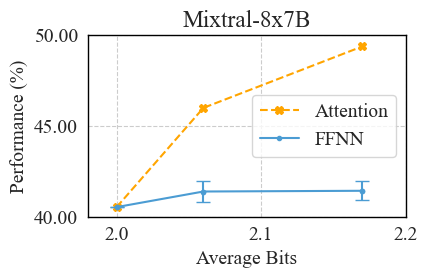

In [21]:
data = {
    'bits': [2, 2.06, 2.17],
    'mean': [40.53, 41.39, 41.43],
    'std': [0.00, 0.57, 0.52],
    'attn': [40.53, 46.00, 49.39]
}

# Creating a DataFrame
df = pd.DataFrame(data)
# Plotting
sns.set_style("whitegrid")
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(4.5, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

# Plot line for mean values
plt.plot(df['bits'], df['attn'], label='Attention', color='#FFA500', linestyle='--', marker='X')
plt.plot(df['bits'], df['mean'], label='FFNN', color='#4B9CD3', linestyle='-', marker='.')
# Add error bars
plt.errorbar(df['bits'], df['mean'], yerr=df['std'], fmt='.', color='#4B9CD3', capsize=5)


ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Adding titles and labels
plt.title('Mixtral-8x7B')
plt.xlabel('Average Bits')
plt.ylabel('Performance (%)')
plt.legend(loc="right")

ax.set_xticks([2, 2.1, 2.2])
ax.set_yticks([40.00, 45.00, 50.00])
ax.set_xlim([1.98, 2.2])

def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)

_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

# Show plot
plt.tight_layout()
plt.savefig('ffnn_vs_attn.pdf', dpi=300)